# LENET

In [1]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Classifier=Sequential()

In [4]:
Classifier.add(Convolution2D(32,3,3,input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(7, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [7]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
training_set=train_datagen.flow_from_directory('data/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 13948 images belonging to 7 classes.


In [9]:
test_set=test_datagen.flow_from_directory('data/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1365 images belonging to 7 classes.


In [10]:
epochs = 20
batch_size = 128

In [11]:
Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/20
108/108 [==============================] - 31s 280ms/step - loss: 0.6656 - accuracy: 0.7500 - val_loss: 0.2471 - val_accuracy: 0.9062
Epoch 2/20
108/108 [==============================] - 30s 275ms/step - loss: 0.0708 - accuracy: 0.9771 - val_loss: 0.1089 - val_accuracy: 0.9594
Epoch 3/20
108/108 [==============================] - 29s 273ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 4/20
108/108 [==============================] - 30s 273ms/step - loss: 0.0271 - accuracy: 0.9902 - val_loss: 0.0126 - val_accuracy: 0.9969
Epoch 5/20
108/108 [==============================] - 30s 276ms/step - loss: 0.0118 - accuracy: 0.9971 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 6/20
108/108 [==============================] - 30s 274ms/step - loss: 0.0878 - accuracy: 0.9939 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7/20
108/108 [==============================] - 30s 276ms/step - loss: 0.0260 - accuracy: 0.9968 - val_loss: 3.7195e-05 - va

In [12]:
import matplotlib.pyplot as plt

In [18]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(Classifier.history.history['accuracy'])
    plt.plot(Classifier.history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(Classifier.history.history['loss'])
    plt.plot(Classifier.history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

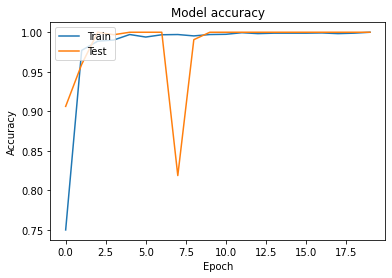

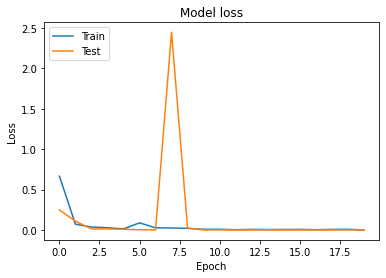

In [19]:
graph()

In [14]:
#import h5py
#Classifier.save('model.h5')